# **AP157 Machine Learning Lab Assignment** 
## Module 3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information 

_Full Name (Last Name, First Name)_: Rangel, Jerico Miguel\
_Student No._: 2018-11666\
_Section_: WFU-WX

### Submission Information

_Date and Time Submitted (most recent upload)_: 06/11/2021 10:32 PM 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: JERICO MIGUEL TAPANG RANGEL** 

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

For this assignment, you will work with galaxy spectra data from the 
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a 
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [4]:
import numpy as np
data = np.load(file_path + 'spec4000_use.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [5]:
data.files

['spec_recons', 'wavelength']

In [6]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

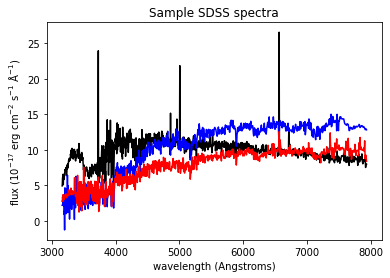

In [8]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


In [9]:
from sklearn.preprocessing import normalize

flux_n = normalize(data['spec_recons'])
mean = np.mean(flux_n, axis = 0)
stddev = np.std(flux_n, axis = 0)

In pre-processing, we normalize the data and acquire the corresponding means and standard deviations. Setting $axis = 0$ as a parameter, we are able to take the means and standard deviations for the data set along each column (attribute). This results in 1000 means and 1000 standard deviations, one for each attribute and in turn, each wavelength bin.

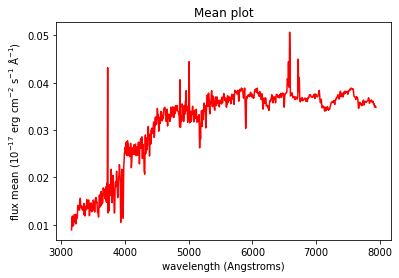

In [10]:
plt.ylabel("flux mean ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Mean plot")
plt.plot(wavelength, mean, 'r-')

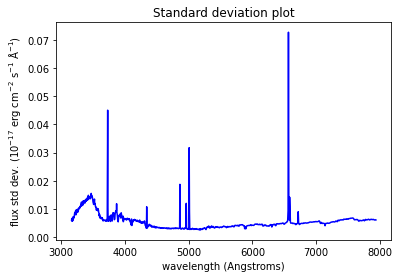

In [11]:
plt.ylabel("flux std dev. ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Standard deviation plot")
plt.plot(wavelength, stddev, 'b-')

We notice that both the meand and standard deviation plots have sudden peaks at three areas, one at around 3700 Å, 5000 Å, and 6500 Å. There are other peaks/dips, and physically, these are related to how the molecules in the galaxy absorb and emit photons. This is most commonly hydrogen, with the variation indicating that there is a high proportion of hydrogen molecules, enough to affect the standard deviation that much.

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)* 


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(flux_n)
vals = pca.explained_variance_ratio_
print(vals)
XD = pca.transform(flux_n)
print(XD.shape)

[0.44152898 0.24275084 0.1023632  0.06901456]
(4000, 4)


We define pca under the Principal Component Analysis class with 4 dimensions/attributes to keep. We fit pca to the normalized spectra dataset, and check the variance accounted for by each PCA acquired. Finally we transform the spectra dataset to reduce the dimensions to 4.

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)* 

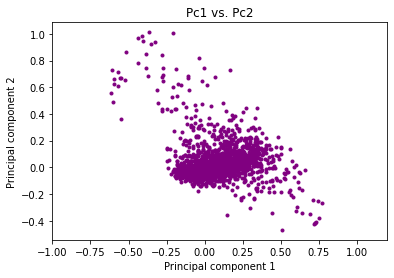

In [13]:
pc1 = XD[:,0] 
pc2 = XD[:,1] 

plt.ylabel("Principal component 2")
plt.xlabel("Principal component 1")
plt.title("Pc1 vs. Pc2")
plt.xlim((-1,1.2))
plt.xlim((-1,1.2))
plt.scatter(pc1,pc2,c='purple',marker=".")

We take the first two principal components and plot them, with the first component along x, and the second component along y. XD is a representation of flux_n but with 4 dimensions instead, and the two most important ones are plotted against one another. This shows us the eigenvector relationship.

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)* 

Text(0.5, 1.0, 'PCA components')

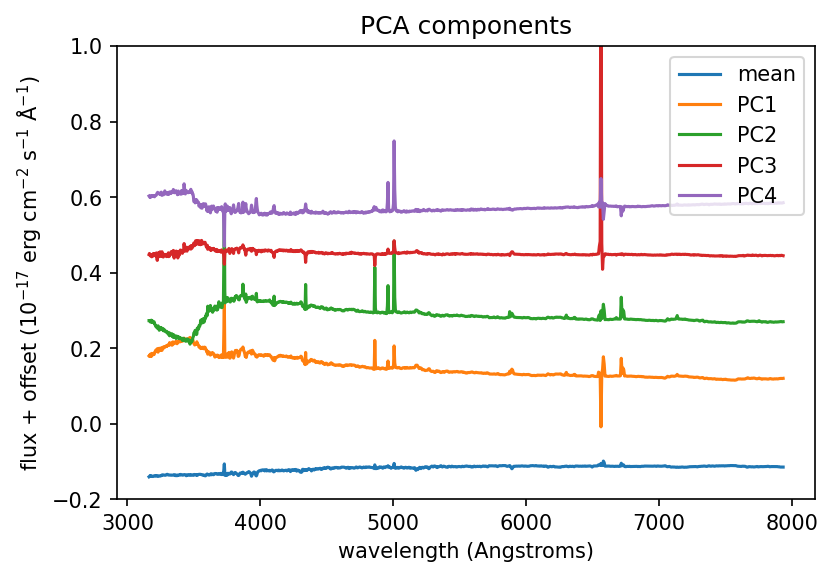

In [14]:
plt.rcParams['figure.dpi'] = 150

ev1 = pca.components_[0]
ev2 = pca.components_[1]
ev3 = pca.components_[2]
ev4 = pca.components_[3]

plt.plot(wavelength,mean - 0.15, label = "mean")
plt.plot(wavelength,ev1 + 0.15, label = "PC1")
plt.plot(wavelength,ev2 + 0.30, label = "PC2")
plt.plot(wavelength,ev3 + 0.45, label = "PC3")
plt.plot(wavelength,ev4 + 0.60, label = "PC4")

plt.ylabel("flux + offset ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.ylim((-0.2,1))
plt.legend(loc="best")
plt.title("PCA components")

Lastly, we decompose the class pca to show us the corresponding eigenvectors used to calculate the principal components. This gives us 1000 values, which makes sense since they are just linear combinations of the other attributes which aim to maximize variance. Plotting the principal components and mean with offsets to easily visualize them, we see how similar they are for the most part. There are however, distinct peaks that are more prevalent for each. These additional kinks and variations in the other PCs help in addressing the variations which were not generalized by the previous PCs. Looking at each PC, we are able to see which wavelengths/attributes they heavily correlate with, from which inferences and interpretations can be made.